<a href="https://colab.research.google.com/github/OgunmodedePeacePax/Brainwave_Matrix_Intern/blob/main/Brainwave_Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fake_news_df = pd.read_csv('Fake.csv')
true_news_df = pd.read_csv('True.csv')

print("Fake News Dataset:")
print(fake_news_df.head())

print("\nTrue News Dataset:")
print(true_news_df.head())


Fake News Dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  

True News Dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans fl

In [ ]:
print("Fake News Dataset Shape:", fake_news_df.shape)
print("True News Dataset Shape:", true_news_df.shape)

print("\nMissing values in Fake News Dataset:")
print(fake_news_df.isnull().sum())

print("\nMissing values in True News Dataset:")
print(true_news_df.isnull().sum())


Fake News Dataset Shape: (23884, 4)
True News Dataset Shape: (21417, 4)

Missing values in Fake News Dataset:
title      0
text       0
subject    0
date       0
dtype: int64

Missing values in True News Dataset:
title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
fake_news_df['label'] = 0  # Label fake news as 0
true_news_df['label'] = 1  # Label true news as 1

combined_df = pd.concat([fake_news_df, true_news_df], ignore_index=True)

combined_df = combined_df.sample(frac=1).reset_index(drop=True)

print("Combined and Shuffled Dataset:")
print(combined_df.head())


Combined and Shuffled Dataset:
                                               title  \
0  HOUSE INTEL Slaps Subpoenas on McCain Institut...   
1  Exclusive: Trump's Afghan decision may increas...   
2  Green groups fund-raise against Trump’s climat...   
3  TRUMP’S WISCONSIN SPEECH Knocks It Out Of The ...   
4  Islamic State claims responsibility for Aden c...   

                                                text          subject  \
0  Please see our previous report below on the Mc...  Government News   
1  ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...     politicsNews   
2  WASHINGTON (Reuters) - Donald Trump’s promise ...     politicsNews   
3  Donald Trump gave a rousing speech in Wisconsi...  Government News   
4  CAIRO (Reuters) - Militant group Islamic State...        worldnews   

                 date  label  
0        Dec 27, 2017      0  
1    August 22, 2017       1  
2      June 10, 2016       1  
3        Aug 17, 2016      0  
4  November 29, 2017       1  


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text

combined_df['text'] = combined_df['text'].apply(clean_text)

print("Cleaned Text Data:")
print(combined_df['text'].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cleaned Text Data:
0    please see our previous report below on the mc...
1    on board a u s  military aircraft  reuters    ...
2    washington  reuters    donald trump s promise ...
3    donald trump gave a rousing speech in wisconsi...
4    cairo  reuters    militant group islamic state...
Name: text, dtype: object


In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

combined_df['text'] = combined_df['text'].apply(preprocess_text)

print("Tokenized and Stop Words Removed Text Data:")
print(combined_df['text'].head())


Tokenized and Stop Words Removed Text Data:
0    please see previous report mccain institute as...
1    board u military aircraft reuters u air force ...
2    washington reuters donald trump promise gut u ...
3    donald trump gave rousing speech wisconsin las...
4    cairo reuters militant group islamic state cla...
Name: text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(combined_df['text'])

y = combined_df['label'].values

print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (45301, 5000)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape (X_train):", X_train.shape)
print("Training Labels Shape (y_train):", y_train.shape)
print("Testing Set Shape (X_test):", X_test.shape)
print("Testing Labels Shape (y_test):", y_test.shape)


Training Set Shape (X_train): (36240, 5000)
Training Labels Shape (y_train): (36240,)
Testing Set Shape (X_test): (9061, 5000)
Testing Labels Shape (y_test): (9061,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of Logistic Regression Model: 0.9867564286502594

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4808
           1       0.98      0.99      0.99      4253

    accuracy                           0.99      9061
   macro avg       0.99      0.99      0.99      9061
weighted avg       0.99      0.99      0.99      9061


Confusion Matrix:
[[4741   67]
 [  53 4200]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy of Naive Bayes Model:", nb_accuracy)

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))


Accuracy of Naive Bayes Model: 0.9335614170621345

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4808
           1       0.93      0.93      0.93      4253

    accuracy                           0.93      9061
   macro avg       0.93      0.93      0.93      9061
weighted avg       0.93      0.93      0.93      9061


Naive Bayes Confusion Matrix:
[[4512  296]
 [ 306 3947]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_nb = {'alpha': [0.5, 1.0, 1.5, 2.0]}

grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')

grid_search_nb.fit(X_train, y_train)

print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best Accuracy for Naive Bayes:", grid_search_nb.best_score_)


Best Parameters for Naive Bayes: {'alpha': 0.5}
Best Accuracy for Naive Bayes: 0.9338024282560706


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("Logistic Regression Predictions Sample:", y_pred[:5])
print("Naive Bayes Predictions Sample:", nb_pred[:5])


Logistic Regression Predictions Sample: [1 1 0 0 1]
Naive Bayes Predictions Sample: [1 0 0 0 1]


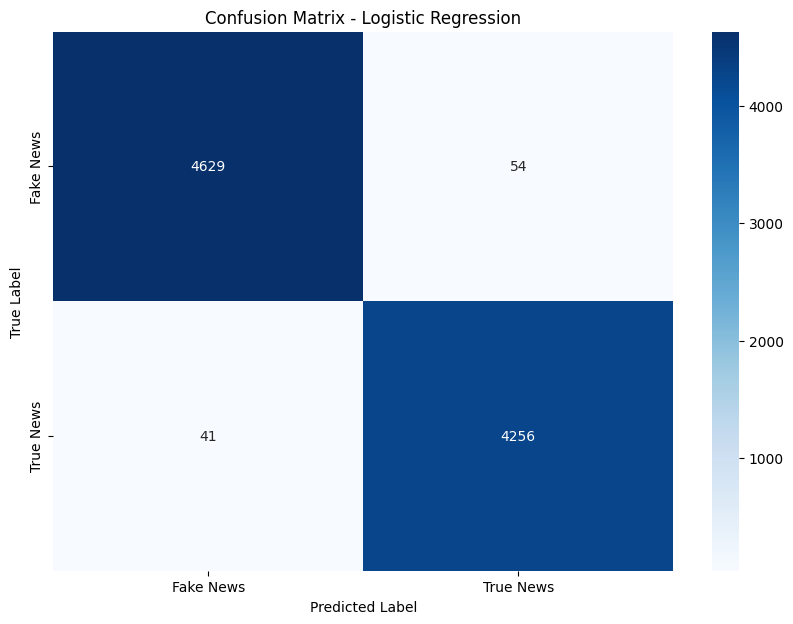

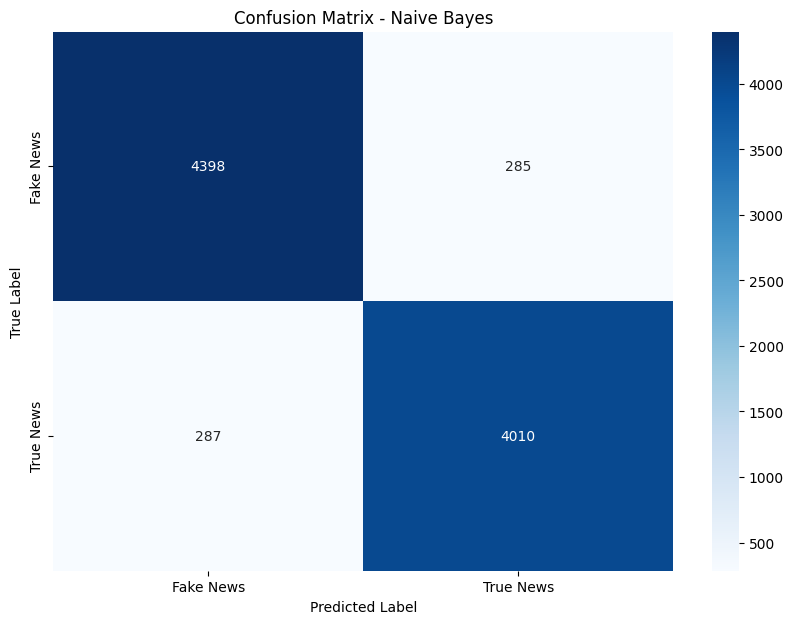

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

log_reg_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake News', 'True News'],
            yticklabels=['Fake News', 'True News'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

nb_cm = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake News', 'True News'],
            yticklabels=['Fake News', 'True News'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


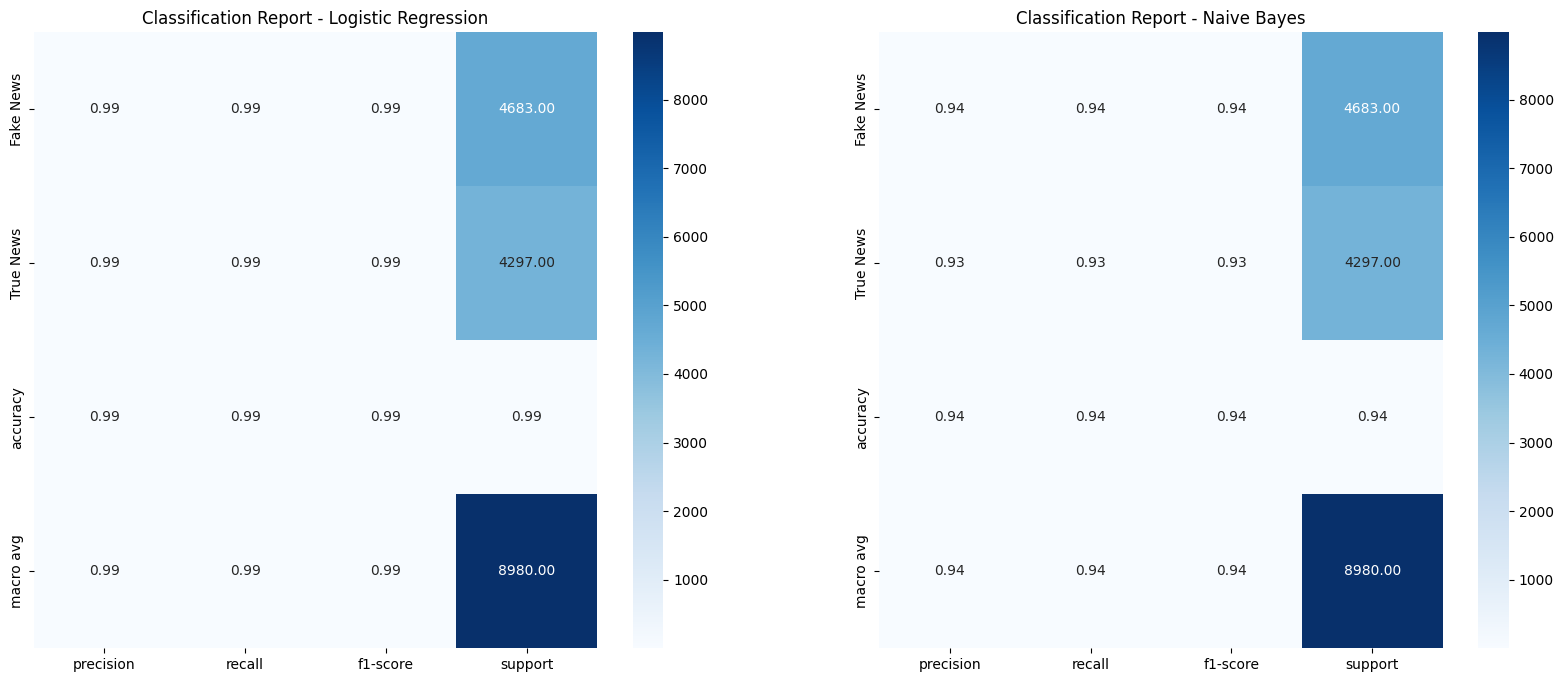

In [19]:
from sklearn.metrics import classification_report
import pandas as pd

log_reg_report = classification_report(y_test, y_pred, target_names=['Fake News', 'True News'], output_dict=True)
log_reg_df = pd.DataFrame(log_reg_report).transpose()

nb_report = classification_report(y_test, nb_pred, target_names=['Fake News', 'True News'], output_dict=True)
nb_df = pd.DataFrame(nb_report).transpose()

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(log_reg_df.iloc[:-1, :], annot=True, cmap='Blues', fmt='.2f', ax=ax[0])
ax[0].set_title('Classification Report - Logistic Regression')

sns.heatmap(nb_df.iloc[:-1, :], annot=True, cmap='Blues', fmt='.2f', ax=ax[1])
ax[1].set_title('Classification Report - Naive Bayes')

plt.show()


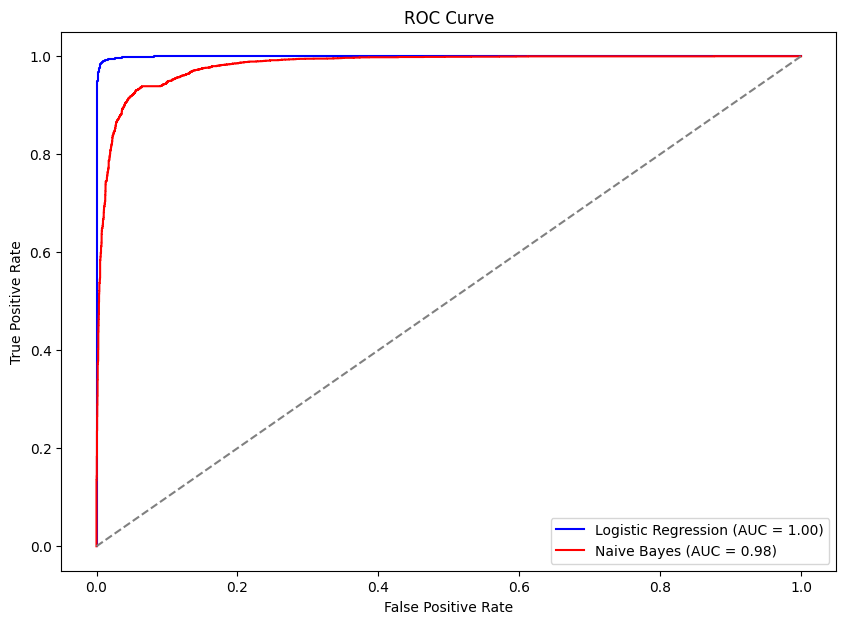

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba_log_reg = model.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_proba_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)

y_proba_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)

plt.figure(figsize=(10, 7))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_nb, tpr_nb, color='red', label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
